# How food shapes the World - Ada project

With 7.7 billion people around the world in 2019, food demand outbreak has raised serious concerns regarding productive agricultural land availability. As for now cultivable surface expansion has been the only real solution, this project aims at providing insights on how this problematic is currently shaping the world’s surface as we know it. Investigation will first focus on the kind of environment that are being impinged on. Moving on to the “destructive” impact of certain foodstuffs and diet trends, correlating with international trade flows. This study relies on FAOSTAT data set from the United Nation, helping us in the process.
We endeavor at providing an exhaustive visualization of the world under growing food reshaping pressure. Key features will be surface evolution across time and space, selected crops impact as well as involved parties and areas. Tackling all of the above with both social awareness and self consciousness concerns.

## Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Opening the dataset

First of all, we need to open the dataset on which we are working. That is, loading it and displayint as much of it as possible to get a better view from it.

In [66]:
datapath = "Data/global-food-agriculture-statistics/"
current_fao = "current_FAO/raw_files/"

savanna = pd.read_csv(datapath + current_fao + "Emissions_Agriculture_Burning_Savanna_E_All_data_(Norm).csv", sep=",", encoding="ANSI")  # Less savanna

Now let's display these dataset and their types quickly : 

### Savanna :

In [67]:
savanna.dtypes

Country Code      int64
Country          object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [68]:
savanna.head(1)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6760,Savanna,7246,Burned Area,1990,1990,Ha,0.9251,Fc


#### Description:
In this dataframe we have the following columns:
- Country Code: One specific number per country
- Country: list of country
- Item Code: One specific number per Item
- Item: A list of different ecosystems
- Element Code: One specific munber per element
- Element: What was actually calculated, measured or estimated
- Year Code: One specific number per year (same as the year)
- Year: The actual year
- Unit: What is the unit of the value of "Value"
- Value: The value found for the element
- Flag: Info on where the data comes from (Fc, A, NaN, F)

There is a total of 50'000 rows.

All the years are registred since 1990 until 2014. There is then prediction for year 2030 and 2050.

There is a total of 275 countries

#### Selection of useful data
As we are only interested in the area lost to burnings. We can do a first selection:

In [69]:
savannaSurface = savanna[savanna['Element'].str.match('Burned Area')]
savannaSurface

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6760,Savanna,7246,Burned Area,1990,1990,Ha,9.251000e-01,Fc
1,2,Afghanistan,6760,Savanna,7246,Burned Area,1991,1991,Ha,9.251000e-01,Fc
2,2,Afghanistan,6760,Savanna,7246,Burned Area,1992,1992,Ha,9.251000e-01,Fc
3,2,Afghanistan,6760,Savanna,7246,Burned Area,1993,1993,Ha,9.251000e-01,Fc
4,2,Afghanistan,6760,Savanna,7246,Burned Area,1994,1994,Ha,9.251000e-01,Fc
...,...,...,...,...,...,...,...,...,...,...,...
432699,5873,OECD,6793,Closed and open shrubland,7246,Burned Area,2012,2012,Ha,3.629652e+07,A
432700,5873,OECD,6793,Closed and open shrubland,7246,Burned Area,2013,2013,Ha,7.042499e+06,A
432701,5873,OECD,6793,Closed and open shrubland,7246,Burned Area,2014,2014,Ha,1.228260e+07,A
432702,5873,OECD,6793,Closed and open shrubland,7246,Burned Area,2030,2030,Ha,1.883991e+07,A


In [70]:
savanna.Item.drop_duplicates()


0                         Savanna
207                 Woody savanna
444              Closed shrubland
685                Open shrubland
928                     Grassland
1169     Burning - all categories
1358    Savanna and woody savanna
1547    Closed and open shrubland
Name: Item, dtype: object

Here is a list of all the different type of ecosystem on which we have data. It seems to contain 2 types of savana, two type of shrubland and grassland. In addition, the tree last categories are aparently agglomeration of the other items.
Lets verify that:
- The Savanna and woody savanna contains the values under the item Savanna and woody savanna.
- Closed and open shrubland contains the values under the item closed shrubland and open shrubland.
- Burning - all categories is a sum of all the types of ecosystem.

To do that:

In [71]:
world_90 = savannaSurface.Value[(savannaSurface['Year']==1990)  & (savannaSurface['Country']=='World')].tolist()
print('Total Savana : ', world_90[0] + world_90[1],' is equal to ', world_90[6])
print('Total shrubland : ', world_90[2] + world_90[3],' is equal to ', world_90[7])
print('Total Surfaces : ', sum(world_90[:5]), ' is equal to ', world_90[5])

Total Savana :  245098958.1444  is equal to  245098958.1444
Total shrubland :  26547260.456800003  is equal to  26547260.4567
Total Surfaces :  311619836.7884  is equal to  311619836.7883


Our hypothesis were indeed correct. There are three main categories: Savana, Shrubland and grassland with subcategories. We also have the total surfaces burned in "Burning - all categories".

We only keep the main Categories: Savana, Shrubland and grassland:

In [72]:
savannaSurface = savannaSurface[(savannaSurface['Item']=='Savanna and woody savanna') | (savannaSurface['Item']=='Closed and open shrubland') | (savannaSurface['Item']=='Grassland')]
savannaSurface = savannaSurface.replace('Savanna and woody savanna','Savanna')
savannaSurface = savannaSurface.replace('Closed and open shrubland','Shrubland')

Let's examinate the countries:
The last 5 Countries of the column country do not contain countries, but the entire world and other group of countries.

In [73]:
savannaSurface.Country.drop_duplicates()
print(savannaSurface.Country.drop_duplicates())
print(savannaSurface.Country.drop_duplicates().head(-5))

928                                   Afghanistan
2652                                      Albania
4420                                      Algeria
5986                               American Samoa
7498                                      Andorra
                           ...                   
426062          Low Income Food Deficit Countries
427574    Net Food Importing Developing Countries
429086                          Annex I countries
430598                      Non-Annex I countries
432110                                       OECD
Name: Country, Length: 275, dtype: object
928                            Afghanistan
2652                               Albania
4420                               Algeria
5986                        American Samoa
7498                               Andorra
                        ...               
418502                           Polynesia
420014                      European Union
421526           Least Developed Countries
423038    Land Locked

In this project we want to find have the burned areas by countries. So we remoe the none country rows of the dataframe:

In [74]:
savannaCountry = savannaSurface.truncate(after=377033)

Now we want to get rid of all the useless column:
- Flag: It won't directly interest us. Just good to keep in mind that not all our data was collected in the same way
- Unit: We are only dealing with [ha] now
- Element: We only consider Burned Area, so no need to keep it in the dataframe
- [...] Code: Do not really contain information

In [75]:
savannaFinal = savannaCountry.drop(['Flag', 'Unit','Year Code', 'Element', 'Element Code','Country Code', 'Item Code'], axis=1)\
                             .rename(columns={"Value": "Area_loss","Item": "Ecosystem"})

In [76]:
savannaFinal.head()

,Country,Ecosystem,Year,Area_loss
928,Afghanistan,Grassland,1990,2323.1605
929,Afghanistan,Grassland,1991,2323.1605
930,Afghanistan,Grassland,1992,2323.1605
931,Afghanistan,Grassland,1993,2323.1605
932,Afghanistan,Grassland,1994,2323.1605


#### Analysis of the desired value:
In this dataset, only the total burned area interests us. Here is the description of the values:

In [77]:
savannaFinal['Area_loss'].describe()

count    1.834500e+04
mean     4.589661e+05
std      2.582753e+06
min      0.000000e+00
25%      0.000000e+00
50%      9.585850e+01
75%      9.982530e+03
max      3.932319e+07
Name: Area_loss, dtype: float64

Let's plot all the data to see how it looks like:

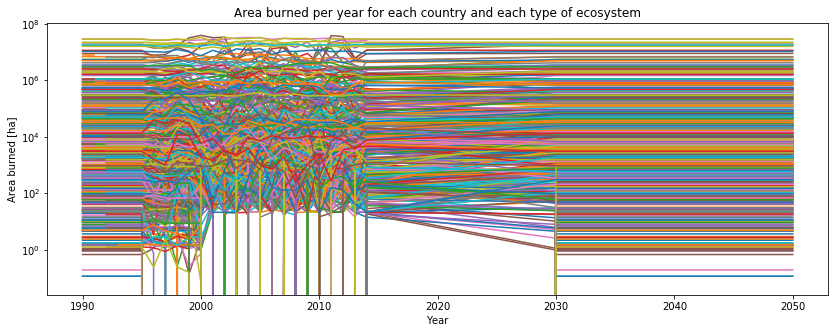

In [78]:
plt.subplots(figsize=(14,5))
for country in savannaFinal.Country.drop_duplicates():
    for Item in savannaFinal.Ecosystem.drop_duplicates():
        year = savannaFinal['Year'][(savannaFinal['Ecosystem']==Item)  & (savannaFinal['Country']==country)]
        burnedArea= savannaFinal['Area_loss'][(savannaFinal['Ecosystem']==Item)  & (savannaFinal['Country']==country)].tolist()
        plt.plot(year, burnedArea)
plt.title('Area burned per year for each country and each type of ecosystem');
plt.xlabel('Year');
plt.ylabel('Area burned [ha]');
plt.yscale('log')

We see on the plot that our values are widely distributed. An odd point is that the six first year are always the same. Eventhough the Data provider said it was "calculated data" (Flag=Fc).

The vertical lines on the graph are due to the log scale. They are in reallity values of 0.

#### Use of Savanna

The final dataframe: "savannaFinal" will be joined to the forest one to answer to the question:
- What is the global evolution of the cultivated surface on a world scale through time?
- Which kind of biomes are reduced at the advantage of agriculture?